## 1. Introduction

**Nama**: Albert Novanto P J

**Batch**: HCK-015

**Objective**: Notebook ini ditujukan untuk membuat model Classification menggunakan Logistic Regression, Model SVC, KNN, Decision Tree, Random Forest, dan XGBoost yang dapat memprediksi shipping yang NOT reached on time atau reached on time

DATA SET FROM KAGGLE [HERE](https://www.kaggle.com/datasets/nayanack/shipping/data)

## 2. Libraries

In [23]:
# Import Library
# Library Dataframe
import pandas as pd

# Library Numerical Data
import numpy as np

# Library Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Statistics
from scipy import stats
from scipy.stats import pearsonr, kendalltau, spearmanr, uniform, randint

# Library Clustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.cm as cm
from sklearn.metrics import silhouette_score,silhouette_samples
from imblearn.over_sampling import SMOTE
# Libraries for Modeling ML
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score,KFold, StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_error, roc_auc_score,mean_squared_error, root_mean_squared_error, r2_score, accuracy_score , classification_report , confusion_matrix,precision_score, recall_score, f1_score,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from feature_engine.outliers import Winsorizer
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.tree import DecisionTreeClassifier

# lib pipelines
import xgboost as xgb
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
# Model Saving
import pickle
import json
import joblib

import warnings

# To ignore all warnings
warnings.filterwarnings("ignore")

import string

## 3. Data Loading

### **Column Description**


| Feature   | Description                                                                                                           |
| ----------|-----------------------------------------------------------------------------------------------------------------------|
| ID      | ID Number of Customers.|
| Warehouse block       | The Company have big Warehouse which is divided in to block such as A,B,C,D,E.|
| Mode of shipment       | The Company Ships the products in multiple way such as Ship, Flight and Road.|
| Customer care calls      | The number of calls made from enquiry for enquiry of the shipment.
| Customer rating      | The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
| Cost of the product      | Cost of the Product in US Dollars.
| Prior purchases     | The Number of Prior Purchase.
| Product importance    | The company has categorized the product in the various parameter such as low, medium, high.
| Gender    | Male and Female.| 
| Discount offered       | Discount offered on that specific product.|
| Weight in gms   | It is the weight in grams.|
| Reached on time      | It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


**description** :

from the column description, we can see that the data has some **categorical columns** and **numerical columns**

In [24]:
# Make new dataset
df = pd.read_csv('shipping.csv')
# Show first 10 data
df.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


**penjelasan** :

menampilkan 10 data pertama

In [25]:
# Show last 10 data
df.tail(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
10989,10990,B,Ship,5,1,218,5,medium,F,9,1603,0
10990,10991,C,Ship,5,4,219,6,low,M,3,1098,0
10991,10992,F,Ship,5,2,261,5,medium,M,9,1227,1
10992,10993,D,Ship,5,1,236,5,medium,M,3,1906,0
10993,10994,F,Ship,5,1,257,6,low,F,1,1150,0
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0
10998,10999,D,Ship,2,5,155,5,low,F,6,1639,0


**penjelasan** :

menampilkan 10 data terakhir

In [26]:
# Duplicate Dataset
new_data = df.copy()

**penjelasan** :

membuat salinan dataset untuk memastikan data asli aman dan tidak berubah

In [27]:
# Show dataset info
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**penjelasan** :

dari info dataset tersebut kita dapat melihat bahwa :
* ada entri `10999` dalam kumpulan data
* tipe data `8` **integer**,dan `4`**object**
* ada `12` kolom di dalam dataset

In [28]:
new_data= new_data.drop(['ID'],axis=1)

**penjelasan**
dikarenakan ID tidak berpengaruh terhadap data yang akan di proses maka akan di drop

## 4. Exploratory Data Analysis


In [29]:
# Describe dataset
new_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,10999.0,4.054459,1.141490,2.0,3.0,4.0,5.0,7.0
Customer_rating,10999.0,2.990545,1.413603,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,10999.0,210.196836,48.063272,96.0,169.0,214.0,251.0,310.0
Prior_purchases,10999.0,3.567597,1.522860,2.0,3.0,3.0,4.0,10.0
Discount_offered,10999.0,13.373216,16.205527,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,10999.0,3634.016729,1635.377251,1001.0,1839.5,4149.0,5050.0,7846.0
Reached.on.Time_Y.N,10999.0,0.596691,0.490584,0.0,0.0,1.0,1.0,1.0


In [30]:
# Count duplicated data
new_data.duplicated().sum()

0

**penjelasan** :

**tidak ada data duplikat**

In [31]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [32]:
# Splitting between numerical and categorical columns
num_columns = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
cat_columns = [col for col in new_data.columns if col not in num_columns]


print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
Numcerical Columns:  ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


**penjelasan**  
Reached.on.Time_Y.N nya  di karenakan column yang akan mempredict nantinya

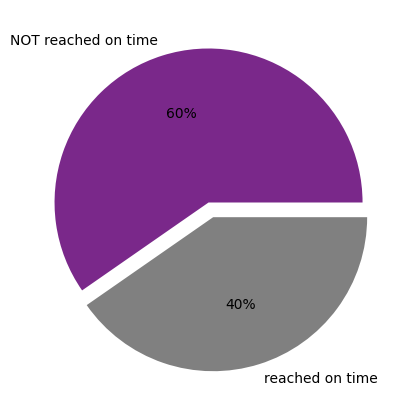

In [33]:
# Make plot pie on infected patients
fig = plt.subplots(figsize=(16, 5))
plt.pie(new_data['Reached.on.Time_Y.N'].value_counts(), labels=['NOT reached on time', 'reached on time'], explode=[0, 0.1], autopct='%.0f%%', colors=['#7A288A', '#808080'])
plt.show()

**penjelasan**  
didapatkan not reached on time sebesar `60%` dan reahed on time sebesar `40%` dan termasuk imbalance

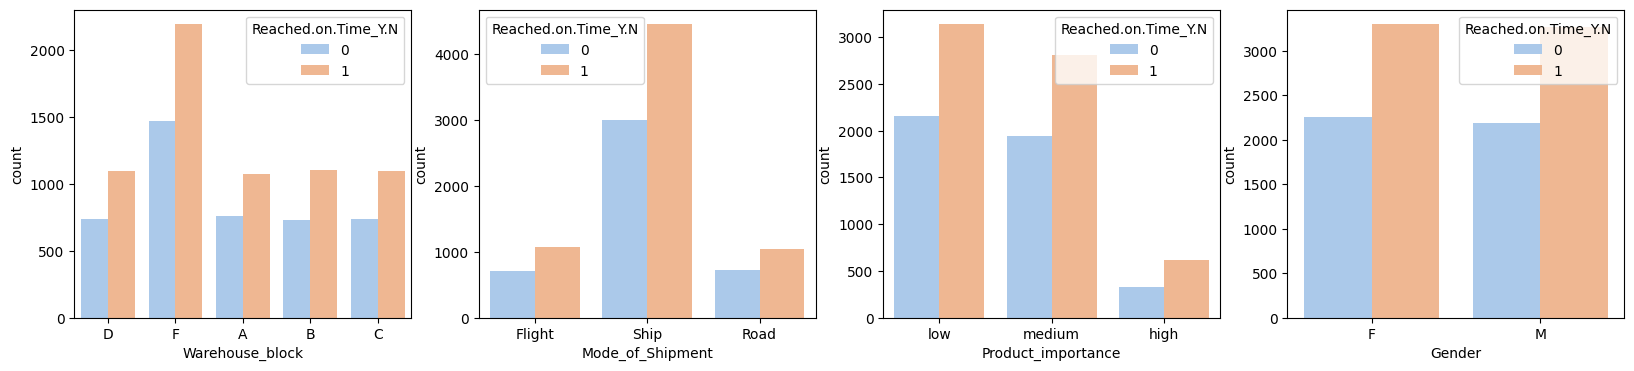

In [34]:
# Select the categorical columns
cat_columns = new_data.select_dtypes(include=['object']).columns

# Create a figure with a specified size
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(20, 4))
for i, col in enumerate(cat_columns[:4]):
    sns.countplot(data=new_data, x=col, hue=new_data['Reached.on.Time_Y.N'], palette='pastel', ax=axs[i])

# Show the plot
plt.show()

**penjelasan**  
* warehouse_block : pada F banyak not reached on time
* mode_of_shipment : pada ship di dapat banyak not reached on time
* product_importance : pada low di dapat banyak not reached on time
* gender : pada gender keduanya banyak not reached on time

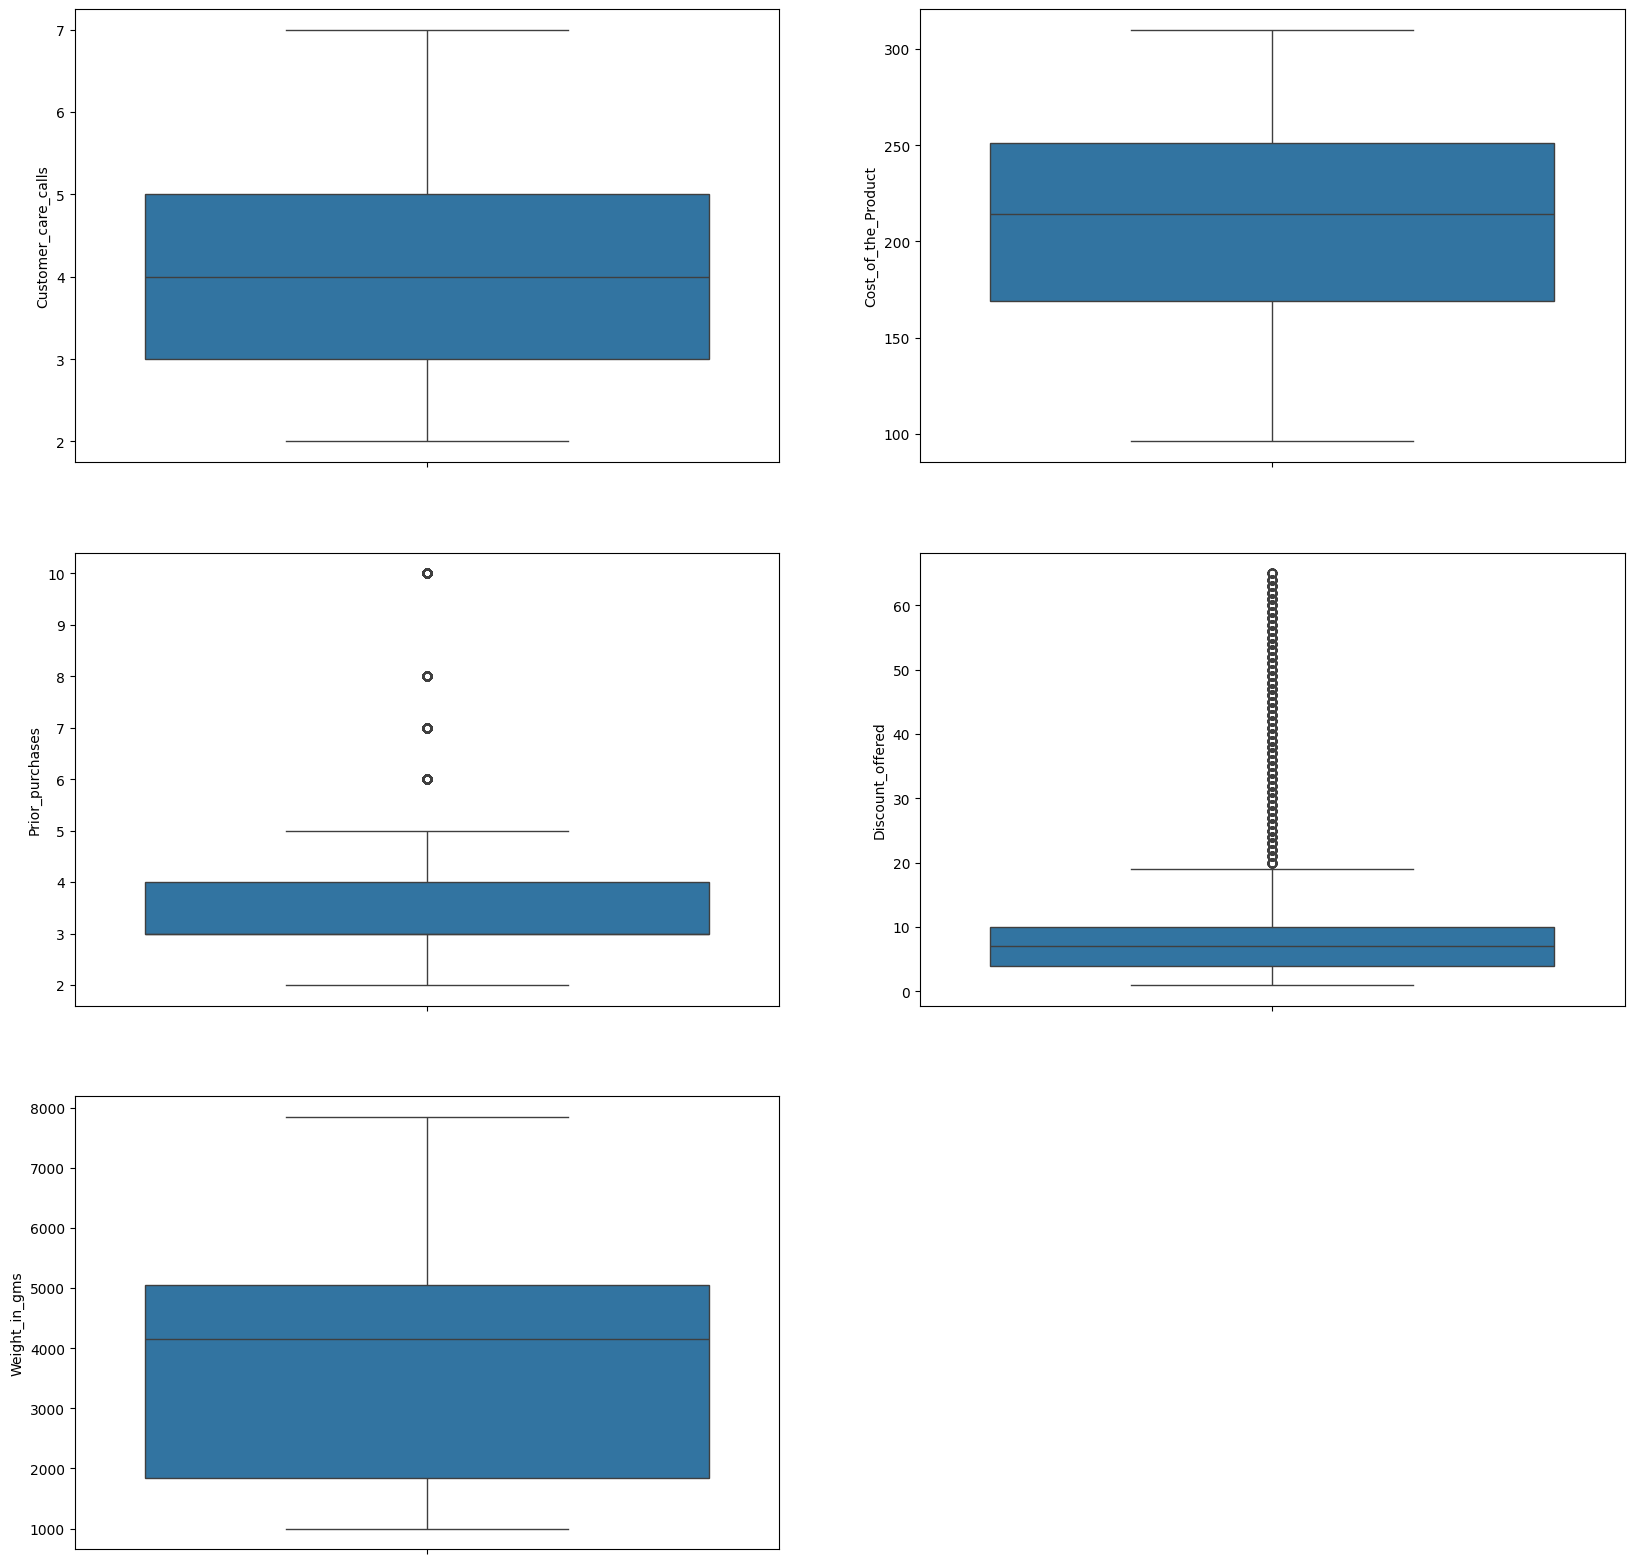

In [35]:
# Check the outliers of numerical data
fig = plt.figure(figsize=(20, 20))
cols = num_columns
num_rows = 3
num_cols = 2

for index in range(1, num_rows*num_cols):
    fig.add_subplot(num_rows, num_cols, index)
    sns.boxplot(data=new_data, y=cols[index-1])
plt.show()

**penjelasan** :

dari kolom numerical di dapatkan :
- banyak data **outliers** dan harus di handle

**penjelasan**

Text(0.5, 1.0, 'Type of shipments (Most Used)')

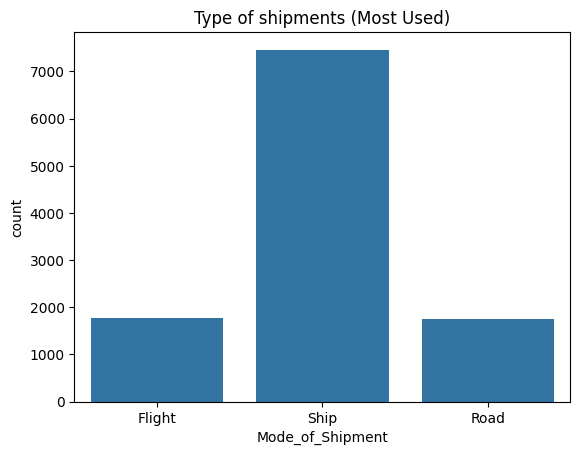

In [36]:
sns.countplot(data=new_data,x="Mode_of_Shipment")
plt.title("Type of shipments (Most Used)")

**penjelasan**

* mode_of_shipment: di dapat banyak yang menggunakan *ship*

Text(0.5, 1.0, 'Model of shipment vs product_cost')

<Figure size 1000x600 with 0 Axes>

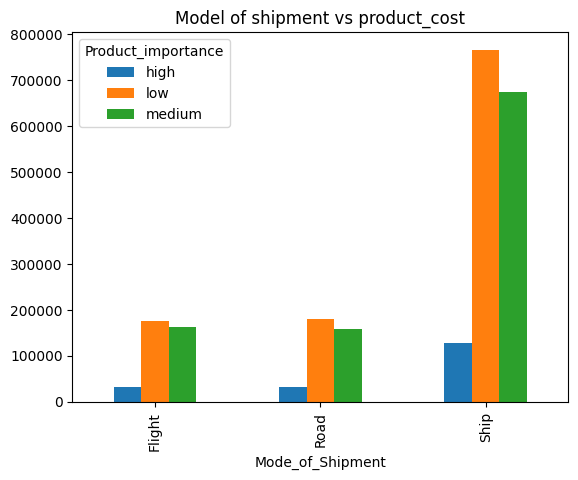

In [37]:
plt.figure(figsize=(10,6))
grouped=df.groupby(["Mode_of_Shipment","Product_importance"])["Cost_of_the_Product"].sum().unstack()
ax=grouped.plot(kind="bar")
ax
plt.title("Model of shipment vs product_cost")

Text(0.5, 1.0, 'Model of shipment vs Weight_in_gms ')

<Figure size 1000x600 with 0 Axes>

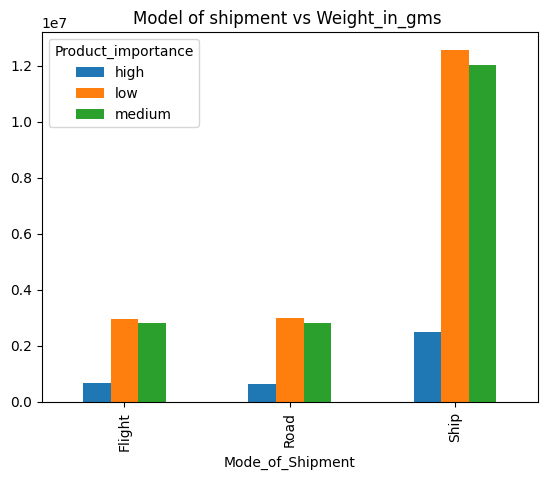

In [38]:
plt.figure(figsize=(10,6))
grouped=df.groupby(["Mode_of_Shipment","Product_importance"])["Weight_in_gms"].sum().unstack()
ax=grouped.plot(kind="bar")
ax
plt.title("Model of shipment vs Weight_in_gms ")

Text(0.5, 1.0, 'Model of shipment vs Discount_offered ')

<Figure size 1000x600 with 0 Axes>

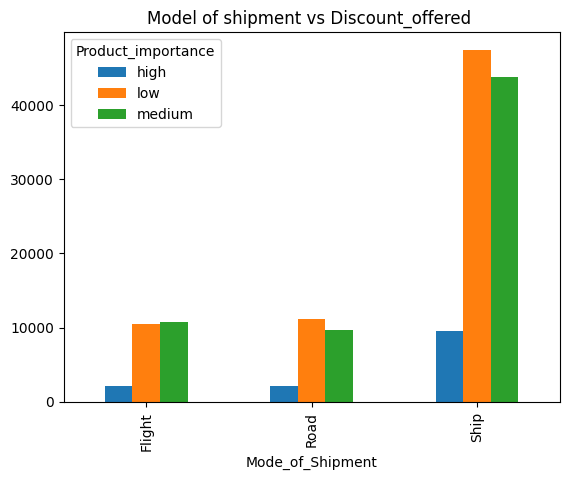

In [39]:
plt.figure(figsize=(10,6))
grouped=df.groupby(["Mode_of_Shipment","Product_importance"])["Discount_offered"].sum().unstack()
ax=grouped.plot(kind="bar")
ax
plt.title("Model of shipment vs Discount_offered ")

**penjelasan**  
Untuk diskon kapal ditawarkan lebih banyak dan juga karena harga dan berat produk semakin banyak orang yang memilih kapal

## 5. Feature Engineering


### **Handling Cardinality**

In [40]:
# Check dataset info
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [41]:

# Splitting between numerical and categorical columns
num_columns = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
cat_columns = [col for col in new_data.columns if col not in num_columns]


print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
Numcerical Columns:  ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


**penjelasan**  
membagi kolom menjadi kolom numerik dan kategorikal agar lebih mudah dianalisis

In [42]:
# Making empty list for appending the unique values
cat_columns_unique = []
# Inspect the Number of Different Labels, for Different Categorical Variables
for cat in cat_columns:
    cat_columns_unique.append([cat, new_data[cat].nunique()])

# Showing dataframe consisting 
pd.DataFrame(data=cat_columns_unique, columns=['categorical_column', 'unique_value'])

,categorical_column,unique_value
0,Warehouse_block,5
1,Mode_of_Shipment,3
2,Customer_rating,5
3,Product_importance,3
4,Gender,2
5,Reached.on.Time_Y.N,2


**penjelasana**  
* Warehouse_block `5` unique value
* Mode_of_Shipment  `3` unique value
* Customer_rating   `5` unique value
* Product_importance    `3` unique value
* Gender	`2` unique value
* Reached.on.Time_Y.N	`2` unique value

### Splitting Between X and Y


In [43]:
X = new_data.drop('Reached.on.Time_Y.N', axis=1)
y = new_data['Reached.on.Time_Y.N']

### Splitting Between Train and Test


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X ,y ,test_size=0.2 ,random_state=43)
print('Train Size', X_train.shape)
print('Test Size', X_test.shape)

Train Size (8799, 10)
Test Size (2200, 10)


**penjelasan**  
* Train Size (8799, 10)
* Test Size (2200, 10)

In [45]:

# Splitting between numerical and categorical columns
num_columns = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
cat_columns = [col for col in new_data.columns if col not in num_columns]


print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']
Numcerical Columns:  ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


### **Handling Missing Value**

In [46]:
# Check null in dataset
X_train.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [47]:
X_test.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

In [48]:
y_train.isnull().sum()

0

In [49]:
y_test.isnull().sum()

0

**penjelasan** :

Kita dapat melihat bahwa ada beberapa **tidak ada nilai null** dalam data, sekarang kita dapat melanjutkan ke langkah rekayasa fitur berikutnya

### **Handling Outliers**

Untuk memudahkan penanganannya, kita akan membuat fungsi untuk membagi setiap kolom menjadi `kolom terdistribusi normal`, dan `kolom terdistribusi miring` dengan penjelasan lebih lanjut apakah kolom tersebut memiliki **kemiringan rendah atau tinggi**

In [50]:
# Making data and columns for normal distribution
data_normal = []
column_normal = []

# Making data and columns for skewed distribution
data_skewed = []
column_skewed = []

# For loop in every numerical column to filer the data distribution into either normal distributed or skewed columns
for num in num_columns:
    skewness = X_train[num].skew()
    
    # If the data normally distributed
    if skewness <= 0.5 and skewness >= -0.5:            
        column_normal.append(num)
        data_normal.append([num, skewness])
        
    # Elif the data has low skewness
    elif skewness < -0.5 and skewness > -1: 
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Elif the data has low skewness
    elif skewness > 0.5 and skewness < 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'low'])

    # Elif the data has high skewness
    elif skewness < -1 or skewness > 1:
        column_skewed.append(num)
        data_skewed.append([num, skewness, 'high'])

In [51]:
# Showing normally distributed columns
pd.DataFrame(data=data_normal, columns=['normal_distribution', 'skewness'])

,normal_distribution,skewness
0,Customer_care_calls,0.382963
1,Cost_of_the_Product,-0.179086
2,Weight_in_gms,-0.254884


**penjelasan** :

pada kolom  `Customer_care_calls`, `Cost_of_the_Product`, dan `Weight_in_gms `kolomnya **normal distribution**

In [52]:
# Showing skewed columns
pd.DataFrame(data=data_skewed, columns=['skewed_distribution', 'skewness', 'rate'])

,skewed_distribution,skewness,rate
0,Prior_purchases,1.651716,high
1,Discount_offered,1.808977,high


**penjelasan** :

di dapat pada kolom `Prior_purchases`, dan `Discount_offered` **skew distribution**

---

Setelah membagi kolom menjadi distribusi normal dan skewed, sekarang kita dapat melanjutkan untuk membatasi outlier dengan metode `gaussian` untuk **kolom terdistribusi normal** dan dengan metode `iqr` untuk **kolom terdistribusi miring**

In [53]:
# Capping Method for Normal Distribution  
winsorizer_normal = Winsorizer(capping_method='gaussian',
                            tail='both',
                            fold=3,
                            variables=column_normal,
                            missing_values='ignore')

# Fit & Transforming X_train 
X_train_capped = winsorizer_normal.fit_transform(X_train)

# Transforming X_test
X_test_capped = winsorizer_normal.transform(X_test)

**penjelasan** :

membatasi **kolom terdistribusi normal**

In [54]:
# Capping Method for Skewed Distribution  
winsorizer_skewed = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=column_skewed)

# Fit & Transforming X_train 
X_train_capped = winsorizer_skewed.fit_transform(X_train_capped)

# Transforming X_test
X_test_capped = winsorizer_skewed.transform(X_test_capped)

**penjelasan** :

membatasi **kolom terdistribusi miring**

In [55]:
# Plot Distribution Comparison
def outlier_handling_plot_comparison(df_before, df_after, variable):

    # Figure Size, and Super Title based on variable
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))                               
    fig.suptitle(f'{variable} - Distribution Before and After Outlier Handling')

    # Plot Histogram Before
    sns.histplot(df_before[variable], bins=30, ax=axes[0, 0], color='orange')
    axes[0, 0].set_title('Histogram Before')

    # Plot Boxplot Before
    sns.boxplot(y=df_before[variable], ax=axes[1, 0])
    axes[1, 0].set_title('Boxplot Before')

    # Plot Histogram After
    sns.histplot(df_after[variable], bins=30, ax=axes[0, 1], color='orange')
    axes[0, 1].set_title('Histogram After')

    # Plot Boxplot After
    sns.boxplot(y=df_after[variable], ax=axes[1, 1])
    axes[1, 1].set_title('Boxplot After')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

**penjelasana** :

berfungsi untuk menunjukkan perbedaan setiap kolom sebelum dan sesudah penanganan outlier

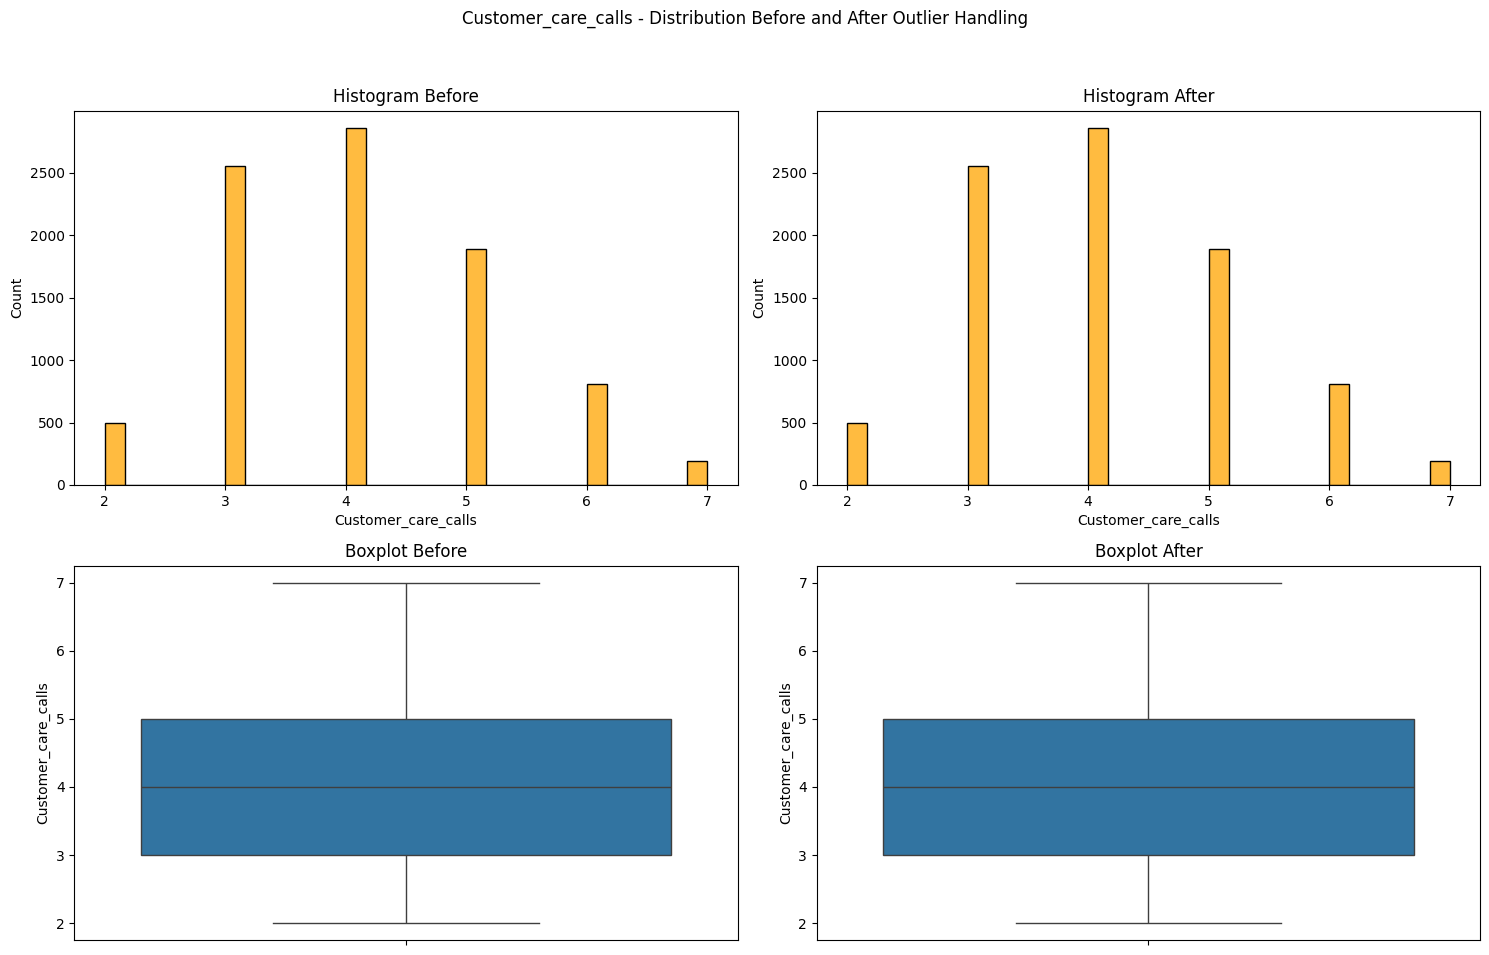

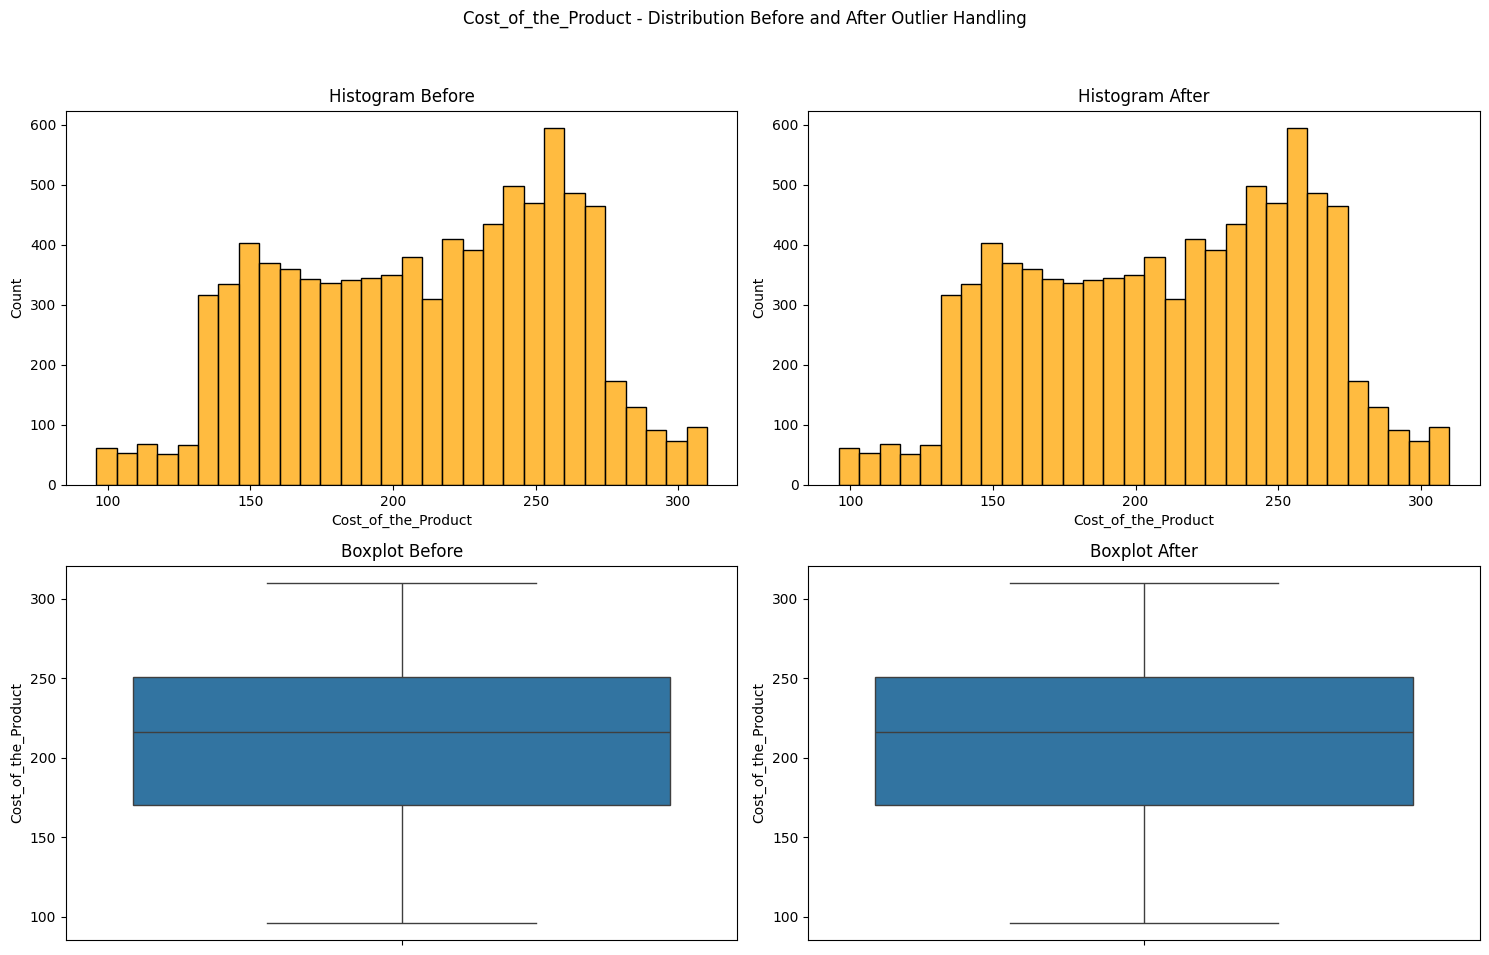

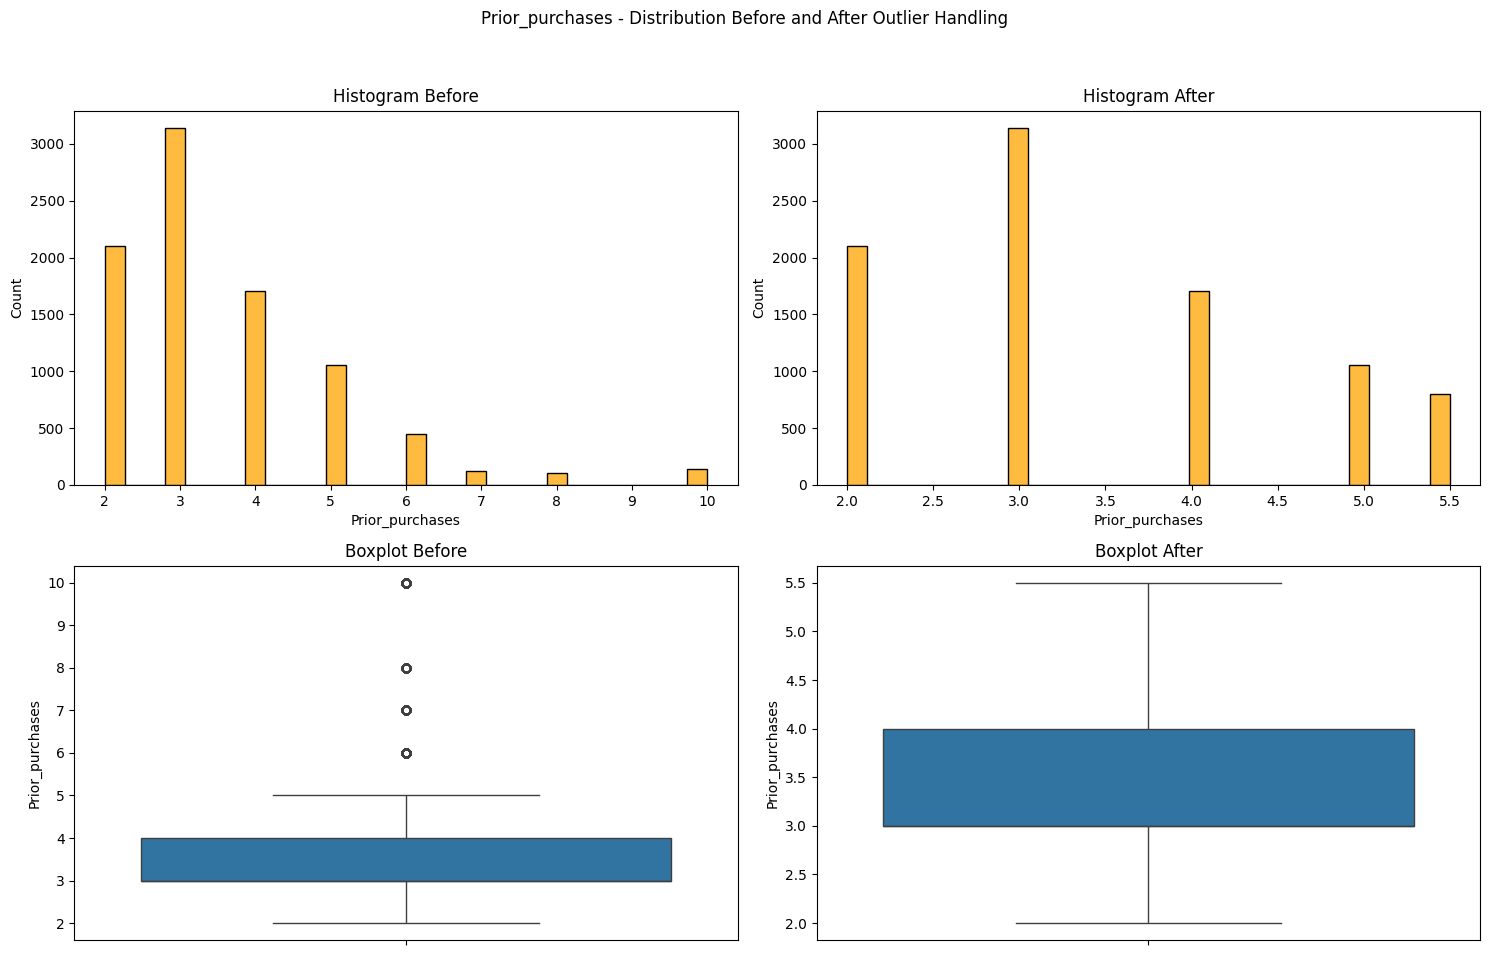

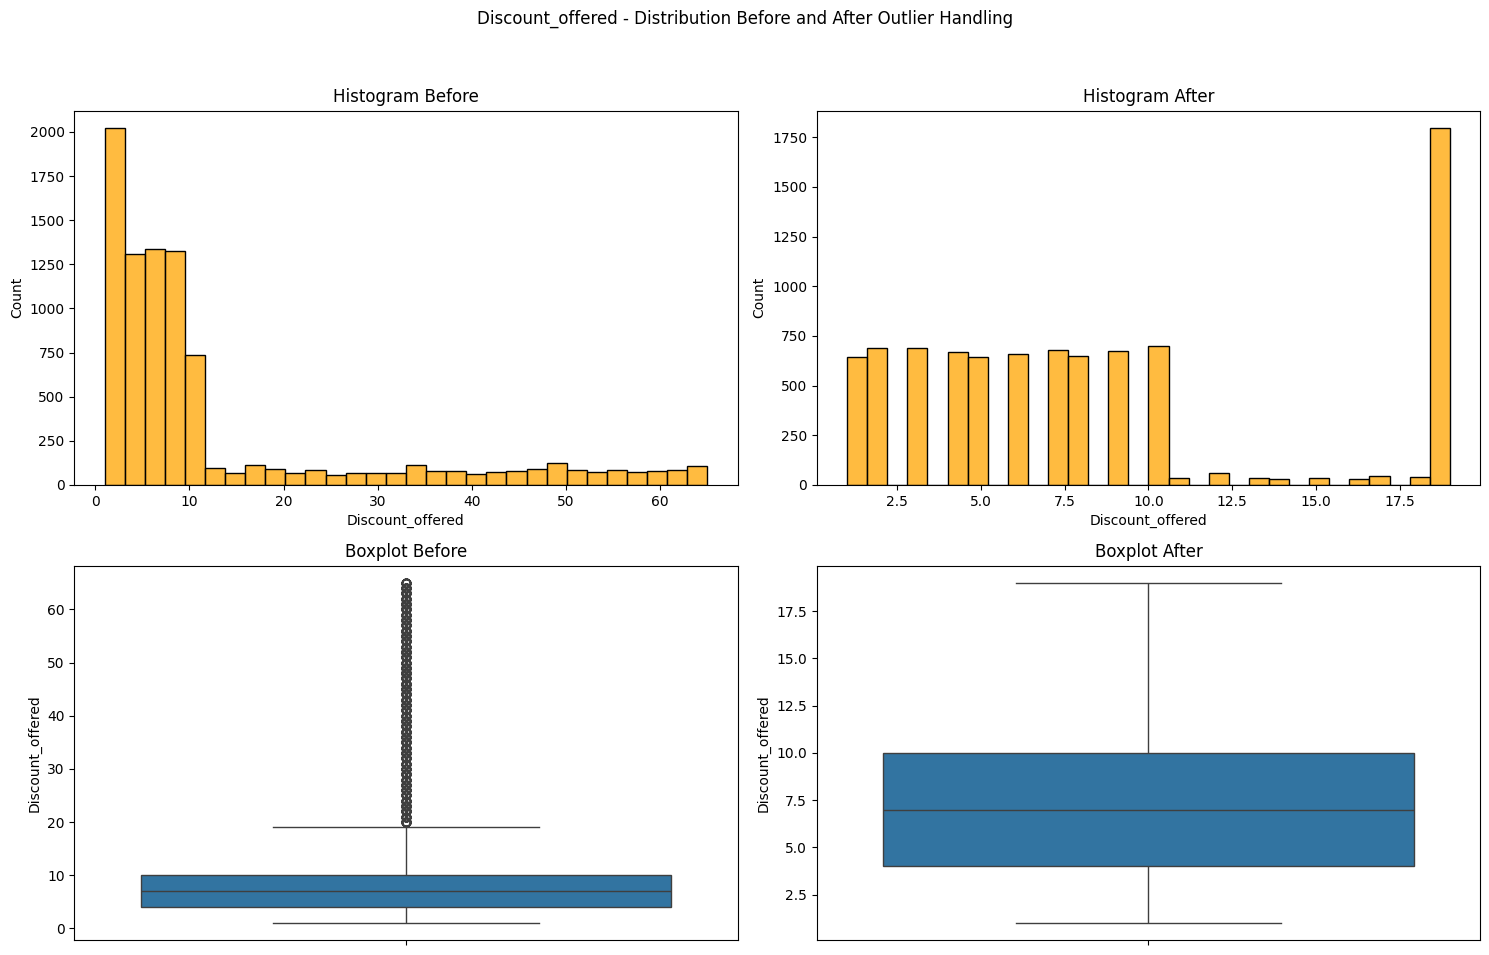

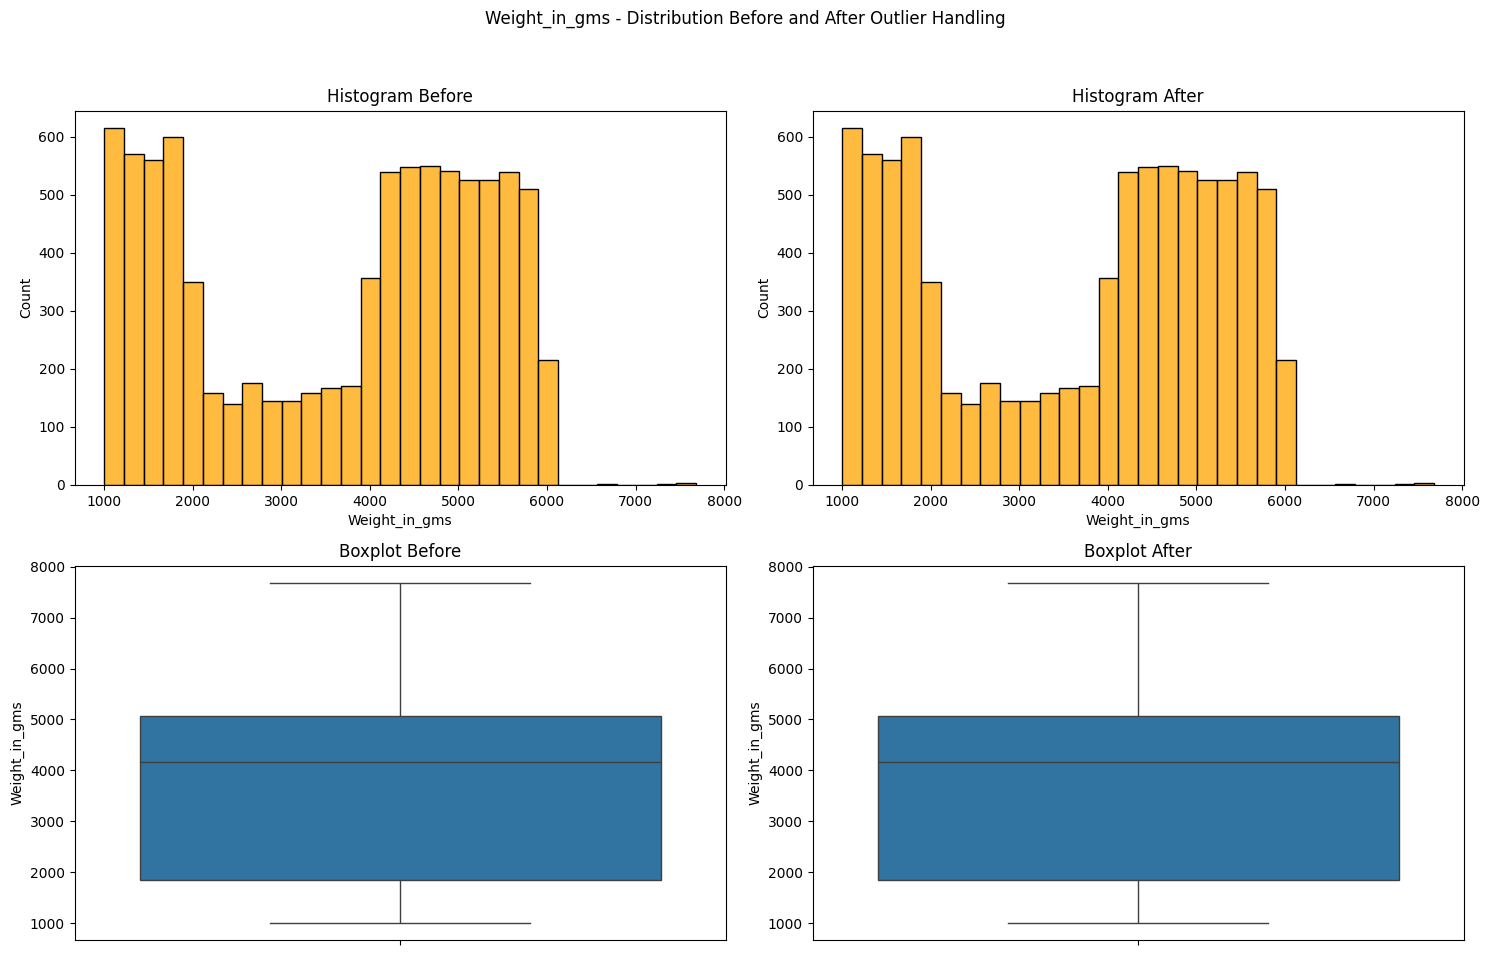

In [56]:
for num in num_columns:
    outlier_handling_plot_comparison(X_train, X_train_capped, num)

**penjelasan**  
hasil yang sudah di hilangkan outliernya

### **Splitting Numerical and Categorical Data**

Setelah menangani outlier, kita akan **membagi data** menjadi kolom kategorikal dan numerik untuk`feature selection`, ` feature scaling` and ` feature encoding`

In [57]:

# Splitting between numerical and categorical columns
num_columns = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
cat_columns = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender']


print('Categorical Columns: ', cat_columns)
print('Numcerical Columns: ', num_columns)

Categorical Columns:  ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance', 'Gender']
Numcerical Columns:  ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


In [58]:
# Splitting the train and test features into categorical and numerical columns
X_train_num = X_train_capped[num_columns]
X_train_cat = X_train_capped[cat_columns]

X_test_num = X_test_capped[num_columns]
X_test_cat = X_test_capped[cat_columns]

X_train_cat.head()

,Warehouse_block,Mode_of_Shipment,Customer_rating,Product_importance,Gender
4126,C,Flight,3,low,M
9145,F,Ship,3,low,M
7852,C,Ship,5,high,M
7754,A,Ship,5,low,M
2,A,Flight,2,low,M


In [59]:
X_train_num

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
4126,4,249,3.0,5,5017
9145,6,279,4.0,7,1090
7852,3,150,3.0,6,4565
7754,7,285,4.0,6,1591
2,2,183,4.0,19,3374
...,...,...,...,...,...
2064,3,156,4.0,7,1492
10517,5,141,3.0,4,4534
7985,4,154,5.5,7,5317
2303,3,181,2.0,19,3236


**penjelasan** :

Setelah memisahkan antara kolom numerik dan kategorikal, kita akan melanjutkan ke **feature selection**

### **Feature Selection**

Untuk uji korelasi antar data kategorikal, kita akan menggunakan uji korelasi **kendall**

In [60]:
#Finding the correlation between categorical columns and Y Train using Kendall Tau's correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_cat_cols = []

for col in X_train_cat.columns:
  corr_coef, p_value = kendalltau(X_train_cat[col], y_train)

  p_values.append(p_value)
  cols.append(col)
  corr.append(corr_coef)

  if p_value < 0.05:
    interpretation.append('Significant')
    selected_cat_cols.append(col)
  else :
    interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,Warehouse_block,0.007675,0.423555,Not Significant
1,Mode_of_Shipment,-0.000864,0.932988,Not Significant
2,Customer_rating,0.005893,0.536566,Not Significant
3,Product_importance,-0.020344,0.048703,Significant
4,Gender,0.006460,0.544579,Not Significant


**penjelasan** :  
didapat kolom yang memiliki korelasi yang significant adalah kolom **Product_impotance**

---

Untuk uji korelasi dengan data numerik, kita akan menggunakan uji korelasi **pearson dan spearman**. Kita akan menggunakan **korelasi Pearson** untuk kolom terdistribusi normal, dan **korelasi spearman** untuk kolom terdistribusi miring

In [61]:
#Finding the correlation between numerical columns and Y Train using pearsonr and spearmanr correlation
p_values = []
interpretation = []
cols = []
corr = []
selected_num_cols = []

for col in X_train_num.columns:
  if abs(X_train_num[col].skew()) < 0.5:                    
    #For Normally Distributed Columns
    corr_coef, p_value = pearsonr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')
  else:                                                     
    #For Skewed Columns
    corr_coef, p_value = spearmanr(X_train_num[col], y_train)

    p_values.append(p_value)
    cols.append(col)
    corr.append(corr_coef)

    if p_value < 0.05:
      interpretation.append('Significant')
      selected_num_cols.append(col)
    else :
      interpretation.append('Not Significant')

pd.DataFrame({'Column Name':cols,
              'Correlation Coefficient' : corr,
              'P-value':p_values,
              'Correlation': interpretation })

,Column Name,Correlation Coefficient,P-value,Correlation
0,Customer_care_calls,-0.068262,1.457528e-10,Significant
1,Cost_of_the_Product,-0.077425,3.525778e-13,Significant
2,Prior_purchases,-0.073431,5.333542e-12,Significant
3,Discount_offered,0.336459,8.021495e-232,Significant
4,Weight_in_gms,-0.266306,9.727169e-143,Significant


**penjelasan** :
di dapatkan bahwa kelima kolom tersebut memiliki korelasi yang significant
`Customer_care_calls`,`Cost_of_the_Product`,`Prior_purchases`,`Discount_offered`,dan `Weight_in_gms`

In [62]:
# Show selected columns based on the correlation test
print(selected_cat_cols)
print(selected_num_cols)

['Product_importance']
['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']


**penjelasan** :

daftar di atas menunjukkan fitur numerik dan kategorikal mana yang berkorelasi dengan kolom target

In [63]:
# Updating Numerical and Categorical Columns
X_train_cat = X_train_cat[selected_cat_cols]
X_train_num = X_train_num[selected_num_cols]

X_test_cat = X_test_cat[selected_cat_cols]
X_test_num = X_test_num[selected_num_cols]

# Show first five data from the updated X_train
X_train_num

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
4126,4,249,3.0,5,5017
9145,6,279,4.0,7,1090
7852,3,150,3.0,6,4565
7754,7,285,4.0,6,1591
2,2,183,4.0,19,3374
...,...,...,...,...,...
2064,3,156,4.0,7,1492
10517,5,141,3.0,4,4534
7985,4,154,5.5,7,5317
2303,3,181,2.0,19,3236


In [64]:
X_train_cat

,Product_importance
4126,low
9145,low
7852,high
7754,low
2,low
...,...
2064,medium
10517,low
7985,high
2303,medium


**penjelasan** :

memperbarui dan memisahkan X_train dan X_test untuk hanya menampilkan kolom dengan fitur numerik dan kategorikal yang berkorelasi dengan kolom target, setelah pemisahan kita dapat beralih ke penskalaan fitur dan pengkodean fitur

---

Untuk penskalaan fitur, kita akan menggunakan `MinMax Scaler` untuk menskalakan data ke rentang tertentu, yang dapat membantu menormalkan data dan memastikan bahwa semua fitur memiliki skala yang sama. `MinMax Scales` berguna ketika fitur memiliki unit atau rentang yang berbeda, karena dapat mencegah fitur dengan rentang yang lebih besar mendominasi proses pembelajaran

---

## 6. Pipeline

Pipelines automate the machine learning workflow, allowing data to be transformed and correlated into a model in a fully automated manner. As we want to see which classification model works best for this dataset, **pipeline can save a significant amount of time and effort**. 

There are some `steps` that we will be using in all of our pipeline models, such as :

1. For **`Feature Scaling`** in this pipeline, we are going to be using the `MinMax Scaler` to scale the data to a specific range, which can help normalize the data and ensure that all features have the same scale. `MinMax Scales` is useful when the features have different units or ranges, as it can prevent features with larger ranges from dominating the learning process

2. For making a **`Pipeline with Multiple Variable`**, in our case a numerical and categorical data, we are going to be using a `Column Transformer` because it allow us to **use different preprocessing steps**

3. For **`Model Definition`**, we are going to be using the `SVM`, `KNN`, `Decision Tree`, `Random Forest`, and `XGBoost` model to see which model is best to fit the data

4. For **`Model Training`**, we are going to fit each model to the final features and balanced target

5. For **`Model Evaluation`**, we are going to measure the `recall`, because we want to evaluate **the false negative**. We need to evaluate the false negative because if the model predict false negative, the patient with AIDS will not get any treatment

6. For **`Cross Validation`**, we are using `10 folds` because we want to **reduce overfitting**

### **SVM**

In [65]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder()) 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, SVC(kernel='rbf', probability=True, class_weight='balanced'))

#Model Training
model_pipeline.fit(X_train, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Generate classification reports for training and test sets
print(f'Train Recall Score Before Tuning : \n', recall_score(y_train, y_train_pred), '\n')
print(f'Test Recall Score Before Tuning: \n', recall_score(y_test, y_test_pred), '\n')

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall")

# Create a dataframe to store the results
svm_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(svm_results_df)

Train Recall Score Before Tuning : 
 0.4372492836676218 

Test Recall Score Before Tuning: 
 0.4435240963855422 

           Metric     Value
0    Train Recall  0.437249
1     Test Recall  0.443524
2  CV Recall Mean  0.435728
3   CV Recall Std  0.020225


**description** :

These results suggest that the `SVM model` is **performing poorly in terms of recall**, and there is significant variability in the model's performance across different subsets of the data

### **KNN**

In [66]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder()) 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())

#Model Training
model_pipeline.fit(X_train, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Generate classification reports for training and test sets
print(f'Train Recall Score Before Tuning : \n', recall_score(y_train, y_train_pred), '\n')
print(f'Test Recall Score Before Tuning: \n', recall_score(y_test, y_test_pred), '\n')

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall")

# Create a dataframe to store the results
knn_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(knn_results_df)

Train Recall Score Before Tuning : 
 0.7759312320916906 

Test Recall Score Before Tuning: 
 0.677710843373494 

           Metric     Value
0    Train Recall  0.775931
1     Test Recall  0.677711
2  CV Recall Mean  0.661133
3   CV Recall Std  0.019071


**description** :

These results suggest that the `KNN model` is **performing reasonably well in terms of recall**, with a relatively high recall score for the training set and a moderate recall score for the test set. However, there is still some variability in the model's performance across different subsets of the data, as indicated by the standard deviation of the cross-validation recall scores

### **Decision Tree**

In [67]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder()) 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, DecisionTreeClassifier())

#Model Training
model_pipeline.fit(X_train, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Generate classification reports for training and test sets
print(f'Train Recall Score Before Tuning : \n', recall_score(y_train, y_train_pred), '\n')
print(f'Test Recall Score Before Tuning: \n', recall_score(y_test, y_test_pred), '\n')

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall")


# Create a dataframe to store the results
dt_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(dt_results_df)

Train Recall Score Before Tuning : 
 1.0 

Test Recall Score Before Tuning: 
 0.6987951807228916 

           Metric     Value
0    Train Recall  1.000000
1     Test Recall  0.698795
2  CV Recall Mean  0.709457
3   CV Recall Std  0.010747


**description** :

These results suggest that the `Decision Tree model` is performing well in terms of recall for the training set, but the recall score for the **test set is relatively low**. The cross-validation recall scores indicate that there is some variability in the model's performance across different subsets of the data. The decision tree model **may be overfitting to the training data** based on the train recall of 1, which can lead to poor generalization performance on unseen data

### **Ensamble Learning**

Ensemble learning is a machine learning technique that **combines the predictions of multiple models** to improve the overall performance of the system. This new model often more robust and more accurate, there are two types of ensamble learning model that we are going to use :

- **Bagging** : Bagging is short for Bootstrap AGGregating. Bagging gets its name because it combines Bootstrapping and Aggregation to form one ensemble model. `Random Forest` is a popular example of a bagging algorithm
- **Boosting** : In boosting, models are trained sequentially, with each model focusing on correcting the errors of the previous model. `XGBoost` is one of the boosting algorithm

#### **Random Forest**

In [68]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder()) 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, RandomForestClassifier())

#Model Training
model_pipeline.fit(X_train, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Generate classification reports for training and test sets
print(f'Train Recall Score Before Tuning : \n', recall_score(y_train, y_train_pred), '\n')
print(f'Test Recall Score Before Tuning: \n', recall_score(y_test, y_test_pred), '\n')

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall")


# Create a dataframe to store the results
rf_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(rf_results_df)

Train Recall Score Before Tuning : 
 1.0 

Test Recall Score Before Tuning: 
 0.6724397590361446 

           Metric     Value
0    Train Recall  1.000000
1     Test Recall  0.672440
2  CV Recall Mean  0.653301
3   CV Recall Std  0.021036


**description** :

These results suggest that the `Random Forest model` is performing well in terms of recall for the training set, but the recall score for the **test set is relatively low**. However, the cross-validation recall scores indicate that the random forest model has better generalization performance compared to the decision tree model

#### **XGBoost**

In [69]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder()) 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, xgb.XGBClassifier())

#Model Training
model_pipeline.fit(X_train, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Generate classification reports for training and test sets
print(f'Train Recall Score Before Tuning : \n', recall_score(y_train, y_train_pred), '\n')
print(f'Test Recall Score Before Tuning: \n', recall_score(y_test, y_test_pred), '\n')

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall")



# Create a dataframe to store the results
xgb_results_df = pd.DataFrame({
    'Metric': ['Train Recall', 'Test Recall', 'CV Recall Mean', 'CV Recall Std'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std()]
})

print(xgb_results_df)

Train Recall Score Before Tuning : 
 0.8592168099331423 

Test Recall Score Before Tuning: 
 0.6573795180722891 

           Metric     Value
0    Train Recall  0.859217
1     Test Recall  0.657380
2  CV Recall Mean  0.656545
3   CV Recall Std  0.019298


**description** :

These results suggest that the `XGBoost model` is performing well in terms of recall for the training set, but the recall score for the **test set is relatively low**. The cross-validation recall scores indicate that the XGBoost model has better generalization performance compared to the decision tree model, but its performance is slightly worse compared to the random forest model

### **Pipeline Summary**

| Model         | Recall train | Recall Test | Difference | CV Mean |
|---------------|--------------|-------------|------------|---------|
| SVM|0.43|0.44|0.01| 0.43|
| KNN|0.77|0.67|0.10|0.66|
| Decision Tree|1.00|0.70|0.30|0.66|
| Random Forest|1.00|0.67|0.33|0.66|
| XGBoost|0.85|0.65|0.20|0.66|

**description** :

Based on the recall scores presented in the table, the **XGBoost model has the highest recall score for the training set**, while the **KNN model has the highest recall score for the test set**. However, the difference in recall scores between the training and test sets for all models is significant, indicating that all models may be overfitting to the training data.

The cross-validation recall scores suggest that the **Random Forest model has the best generalization performance**, followed closely by the XGBoost model. The KNN model has a higher cross-validation recall score compared to the Decision Tree model, but its performance is still worse than that of the Random Forest and XGBoost models.

Therefore, based on the recall test scores presented in the table, the **KNN model is the best choice for classification**, followed closely by the XGBoost model. Additionally, hyperparameter tuning, feature engineering, and ensemble methods can be used to further improve the performance of these models.

## 7. Hyperparameter Tuning

The **hyperparameters** chosen for the K-Nearest Neighbors (KNN) classifier are:

1. n_neighbors: The number of nearest neighbors to consider when making a prediction. A range of values from 1 to 10 is explored, which is a reasonable range for many datasets.
2. weights: The weight function used to assign weights to the neighbors. Two options are explored: uniform (all neighbors have equal weight) and distance (neighbors are weighted by their distance to the query point).
3. algorithm: The algorithm used to compute the nearest neighbors. Four options are explored: auto (choose the best algorithm based on the dataset), ball_tree, kd_tree, and brute (a simple, brute-force algorithm).

**Grid Search** is a hyperparameter tuning method that exhaustively searches through a grid of possible hyperparameter combinations to find the best one. Grid Search ensures that all possible hyperparameter combinations are explored, which can lead to better performance than random search or other methods.

In [70]:
# Define preprocessing pipelines
num_pipeline = make_pipeline(MinMaxScaler())
cat_pipeline = make_pipeline(OrdinalEncoder()) 

# Define preprocessing column transformer
preprocessing_pipeline = ColumnTransformer([
    ('num', num_pipeline, selected_num_cols),
    ('cat', cat_pipeline, selected_cat_cols)
])

# Define model pipeline
model_pipeline = make_pipeline(preprocessing_pipeline, KNeighborsClassifier())

#Model Training
model_pipeline.fit(X_train, y_train)

# Calculate predictions for training and test sets
y_train_pred = model_pipeline.predict(X_train)
y_test_pred = model_pipeline.predict(X_test)

# Cross Validation
recall_train_cross_val = cross_val_score(model_pipeline,
                                     X_train,
                                     y_train,
                                     cv=10,
                                     scoring="recall")


# Define Hyperparameters
param_grid = {
    'kneighborsclassifier__n_neighbors': list(range(1, 11)),
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}


# Perform grid search with cross-validation
grid_search = GridSearchCV(model_pipeline, 
                           param_grid=param_grid, 
                           cv=10, 
                           scoring='recall')
grid_search.fit(X_train, y_train)

# Print best hyperparameters
print("Best hyperparameters found:")
print(grid_search.best_params_, '\n')

# Evaluate the best model
KNN_best_model = grid_search.best_estimator_

# Check Performance Model against Train-set
y_pred_train = KNN_best_model.predict(X_train)
y_pred_test = KNN_best_model.predict(X_test)

# Create a dataframe to store the results
knn_results_tunning_df = pd.DataFrame({
    'Metric': ['Train Recall Before Tuning', 'Test Recall Before Tuning', 'CV Recall Mean', 'CV Recall Std', 'Train Recall After Tuning', 'Test Recall After Tuning'],
    'Value': [recall_score(y_train, y_train_pred), recall_score(y_test, y_test_pred), recall_train_cross_val.mean(), recall_train_cross_val.std(), recall_score(y_train, y_pred_train), recall_score(y_test, y_pred_test)]
})

display(knn_results_tunning_df)

Best hyperparameters found:
{'kneighborsclassifier__algorithm': 'auto', 'kneighborsclassifier__n_neighbors': 1, 'kneighborsclassifier__weights': 'uniform'} 



,Metric,Value
0,Train Recall Before Tuning,0.775931
1,Test Recall Before Tuning,0.677711
2,CV Recall Mean,0.661133
3,CV Recall Std,0.019071
4,Train Recall After Tuning,1.000000
5,Test Recall After Tuning,0.687500


**description** :

The results show that the `KNN classifier` with the best hyperparameters achieved a recall score of **0.77 on the training set** and **0.677 on the test set**. The **cross-validation recall score was 0.1**, with a standard deviation of 0.1, indicating that the model can maintain its performance on new, unseen data, even if it has been trained on a large and diverse dataset.

Overall, the hyperparameter tuning for the `KNN classifier` resulted in a model with **improved recall performance** on the dataset.**description** :


## 8. Model Saving

In [71]:
# Save the best model pipeline for model inference
joblib.dump(KNN_best_model, 'knn_best_model_pipeline.joblib')

['knn_best_model_pipeline.joblib']

**description** :

- Save the best model pipeline using joblib, which can be loaded later for model inference
- Save the preprocessing pipeline separately, which can be reused for future data preprocessing